# Фабричный метод

Фабричный метод  — это порождающий паттерн проектирования, который определяет общий интерфейс для
создания объектов в суперклассе, позволяя подклассам изменять тип создаваемых объектов.

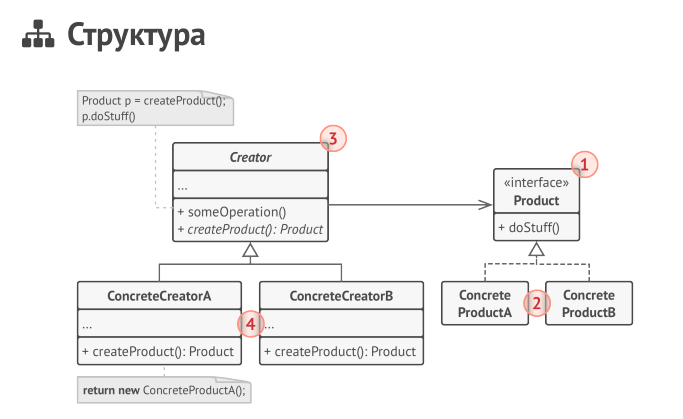

In [5]:
class Product:
    # опредялем общий интерфейс
    def do_stuff(self):
        pass

    
class ConcretProductA(Product):
    def do_stuff(self):
        print('{} do stuff'.format(self))
        

class ConcretProductB(Product):
    def do_stuff(self):
        print('{} do stuff'.format(self))


def create_product_a():
    return ConcretProductA()


def create_product_b():
    return ConcretProductB()


# client
class Application:
    creater_product_by_type = {
        'A': create_product_a,
        'B': create_product_b,
        'default': create_product_a,
    }
    def __init__(self, type_product='default'):
        create_product = self.creater_product_by_type.get(type_product, 'default')
        self.product = create_product()

    def do_stuff(self):
        print('{} do stuff'.format(self))
        return self.product.do_stuff()


app = Application()
app.do_stuff()

<__main__.Application object at 0x7f2a317a5978> do stuff
<__main__.ConcretProductA object at 0x7f2a317a5a58> do stuff


# Применимость

## Когда заранее неизвестны типы и зависимости объектов, с которыми должен работать ваш код.

Фабричный метод отделяет код производства продуктов от остального кода, который эти продукты использует.
Благодаря этому, код производства можно расширять, не трогая основной код. Так, чтобы добавить поддержку
нового продукта, вам нужно создать новый подкласс и определить в нём фабричный метод, возвращая оттуда
экземпляр нового продукта.

## Когда вы хотите дать возможность пользователям расширять части вашего фреймворка или библиотеки.

Пользователи могут расширять классы вашего фреймворка через наследование. Но как сделать так, чтобы фреймворк
создавал объекты из этих новых классов, а не из стандартных?

Решением будет дать пользователям возможность расширять не только желаемые компоненты, но и классы, которые создают эти компоненты. А для этого создающие классы должны иметь конкретные создающие методы, которые можно определить.

Например, вы используете готовый UI-фреймворк для своего приложения. Но вот беда, требуется иметь круглые
кнопки, вместо стандартных прямоугольных. Вы создаёте класс RoundButton . Но как сказать главному классу
фреймворка ( UIFramework ), чтобы он теперь создавал круглые кнопки, вместо стандартных.

Для этого вы создаёте подкласс UIWithRoundButtons из базового класса фреймворка, переопределяете в нём метод
создания кнопки ( createButton ) и вписываете туда создание своего класса кнопок. Затем, используете UIWithRoundButtons вместо стандартного UIFramework.

## Когда вы хотите экономить системные ресурсы, повторно используя уже созданные объекты, вместо создания новых.

Такая проблема обычно возникает при работе с тяжёлыми ресурсоёмкими объектами, такими как подключение к базе
данных, файловой системе и т.д.

Представьте, сколько действий вам нужно совершить, чтобы повторно использовать существующие объекты:

1. Сперва вам следует создать общее хранилище, чтобы хранить вы нём все создаваемые объекты.
2. При запросе нового объекта, нужно будет заглянуть в хранилище и проверить, есть ли там неиспользуемый объект.
3. А затем вернуть его клиентскому коду.
4. Но если свободных объектов нет — создать новый, не забыв добавить его в хранилище.

Весь этот код нужно куда-то поместить, чтобы не засорять клиентский код.
Самым удобным местом был бы конструктор объекта, ведь все эти проверки нужны только при создании объектов. Но, вы, конструктор всегда создаёт новые объекты, он не может вернуть существующий экземпляр.

Значит, должен другой метод, который бы отдавал как существующие, так и новые объекты. Им и станет фабричный метод.

# Преимущества

- Избавляет класс от привязки к конкретным классам продуктов.
- Выделяет код производства продуктов в одно место, упрощая поддержку кода.
- Упрощает добавление новых продуктов в программу.
- Реализует принцип открытости/закрытости.

# Недостатки

- Может привести к созданию больших параллельных иерархий классов, так как для каждого класса продукта надо создать свой подкласс создателя.